In [39]:
import os, sys, json, requests
import pandas as pd
import numpy as np
from shapely.geometry import shape,mapping, Point, Polygon, MultiPolygon
import shapely, fiona
import geopandas as gpd
import matplotlib.pyplot as plt 

# self defined class for both geopandas and regular pandas loader 
'''
data loader class that loads a data frame 
@param dataframe 
@param __data: private original dataframe
@param __buffer: private copy of original buffer
@method get_data: return modified buffer
@method stats: print stats of dataframe
'''
import os, sys, json, requests
import pandas as pd
import numpy as np
from shapely.geometry import shape,mapping, Point, Polygon, MultiPolygon
import shapely, fiona
import geopandas as gpd
import matplotlib.pyplot as plt 

class DataLoader():
    def __init__(self, data):
        self.__data = data
        self.__buffer = data.copy(deep=True)
    def get_data(self):
        return self.__buffer
    def stats(self):
        print("Head of dataframe: ")
        print(self.__buffer.head(5))
        print("DataFrame Stats: ")
        print(self.__buffer.describe())
        print("DataFrame Summary: ")
        print(self.__buffer.info())
        return None
'''
data cleaner class that preprocess data 
@param __data: private original dataframe
@param __buffer: private copy of original buffer
@method clean_na: drop all nan values
@method get_cols: retrive target columns
@method drop_cols: drop unwanted columns
@method fill: fill nan with a specific number (default 0)
'''
class DataCleaner(DataLoader):
    def __init__(self, data):
        super().__init__(data)
        self.__buffer = data.copy(deep=True)
    def clean_na(self):
        print("None value count: ")
        print(self.__buffer.isnull().sum())
        self.__buffer = self.__buffer.dropna()
        print("After clean: ")
        print(self.__buffer.isnull().sum())
        return self.__buffer
    def get_cols(self, array):
        return self.__buffer[array]
    def drop_cols(self, array):
        return self.__buffer.drop(columns=array)
    def fill(self, num=0):
        return self.__buffer.fillna(num)
'''
geo data loader that loads data into dataframe 
@param __data: private original dataframe
@param __buffer: private copy of original buffer
@method: transform dataframe in to desired standard (epsg default 2263)
'''
class GeoDataLoader(DataLoader):
    def __init__(self, data):
        super().__init__(data)
        self.__buffer = data.copy(deep=True)
    def transform(self, epsg=2263):
        return self.__buffer.to_crs(epsg=epsg)
'''
geo data cleaner..same as data cleaner 
'''
class GeoDataCleaner(DataCleaner):
    def __init__(self, data):
        super().__init__(data)
        self.__buffer = data.copy(deep=True)

In [40]:
__author__ = "__gabriel__"
__contact__ = "__gabrielyin@berkeley.edu__"

# read shapefile
try:
    print("Reading Data...")
    pumashp = gpd.GeoDataFrame.from_file('PUMA_shp/puma.shp')
    print("You have successfully loaded the data.")
except ValueError:
    print("Error reading shapefile.")

Reading Data...
You have successfully loaded the data.


In [41]:
key = 'B28002_001E'
'''
PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD
'''
from censusAPI import *
import io
url = "https://api.census.gov/data/2016/acs/acs1?get=" + key +\
",NAME&for=public%20use%20microdata%20area:*&in=state:36&key=" + myAPI
resp = requests.request('GET', url).content
df = pd.read_csv(io.StringIO(resp.decode('utf-8').replace('[','').replace(']','')))

df.head()

,B28002_001E,NAME,state,public use microdata area,Unnamed: 4
0,40479,"St. Lawrence County PUMA, New York",36,100,NaN
1,67092,"Clinton, Franklin, Essex & Hamilton Counties P...",36,200,NaN
2,51614,"Warren & Washington Counties PUMA, New York",36,300,NaN
3,44300,Herkimer (North & Central) & Oneida (Outer) Co...,36,401,NaN
4,61146,Oneida County (Central)--Greater Utica & Rome ...,36,402,NaN


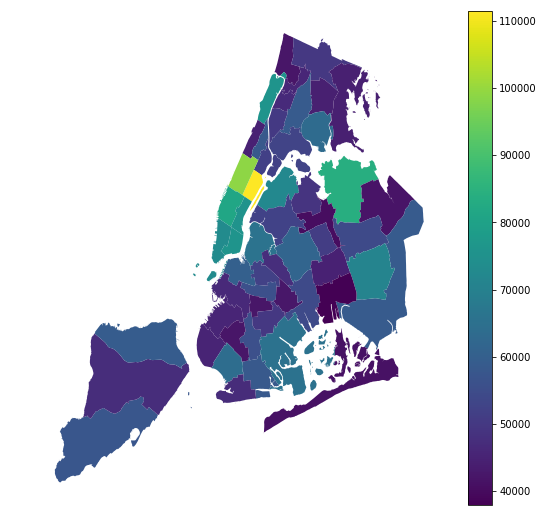

In [42]:
df['public use microdata area'] = df['public use microdata area'].astype('str')
pumashp = pumashp.merge(df[['public use microdata area', 'B28002_001E']], \
                        left_on='puma', right_on='public use microdata area')
# now make the plot...cheers
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(222)
ax.axis('off')
pumashp.plot(column='B28002_001E',ax=ax,legend=True)

### Figure 1 : Estimated Total Internet Subscriptions in Each Puma Area